(1000, 1500, 3)


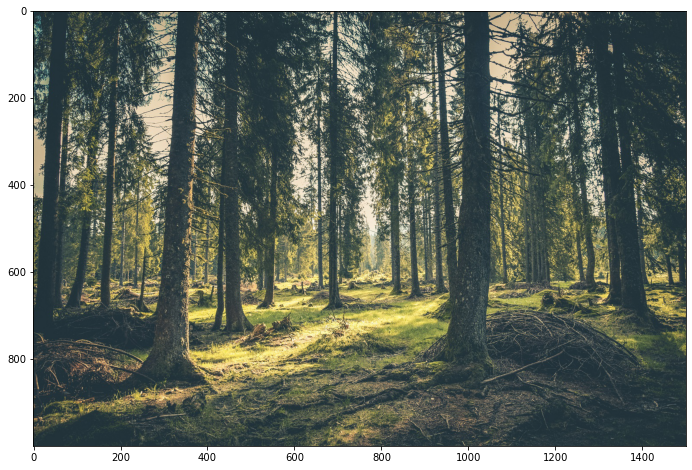

In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("Image_reduced.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)



(1000, 1500)
1.0


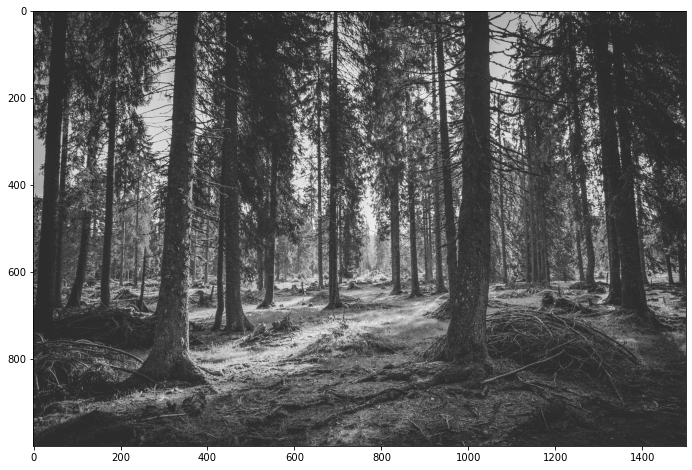

In [2]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

In [3]:
image_bw

array([[0.19477124, 0.22352941, 0.2       , ..., 0.19869281, 0.1751634 ,
        0.21045752],
       [0.19346405, 0.29150327, 0.24836601, ..., 0.1869281 , 0.19477124,
        0.30065359],
       [0.19869281, 0.60261438, 0.49281046, ..., 0.19215686, 0.1869281 ,
        0.29673203],
       ...,
       [0.19215686, 0.19477124, 0.19084967, ..., 0.1869281 , 0.1869281 ,
        0.1869281 ],
       [0.19607843, 0.19869281, 0.18300654, ..., 0.1869281 , 0.1869281 ,
        0.1869281 ],
       [0.18823529, 0.1869281 , 0.18300654, ..., 0.18300654, 0.1869281 ,
        0.1869281 ]])

Number of components explaining 95% variance: 442


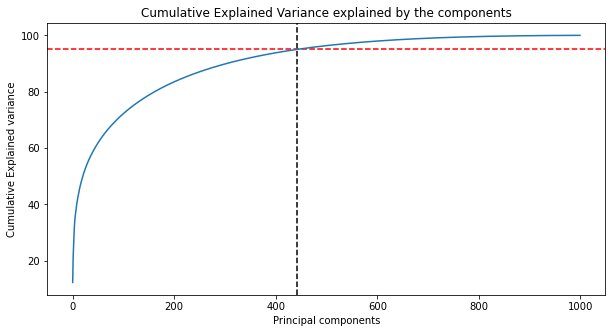

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

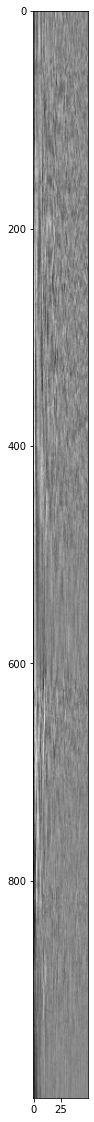

In [6]:
ipca = IncrementalPCA(n_components=50)
image_recon = ipca.fit_transform(image_bw)

# Plotting the reconstructed image
plt.figure(figsize=[20,20])
plt.imshow(image_recon,cmap = plt.cm.gray)



In [7]:
ipca.components_

array([[ 0.0281661 ,  0.02595222,  0.02537965, ..., -0.01300238,
        -0.01521614, -0.01793245],
       [ 0.05484216,  0.05407007,  0.05885627, ...,  0.00472852,
         0.00557482,  0.0062337 ],
       [-0.02870508, -0.03263893, -0.03499982, ...,  0.00276403,
         0.00299018,  0.00701815],
       ...,
       [ 0.01146553, -0.00498153,  0.00298005, ...,  0.0088846 ,
         0.00320235,  0.00779588],
       [ 0.01780174, -0.0094858 , -0.01694371, ..., -0.01229519,
        -0.01343172, -0.0229514 ],
       [-0.01770317,  0.01971305,  0.03397542, ...,  0.01125764,
         0.00942679,  0.01346813]])

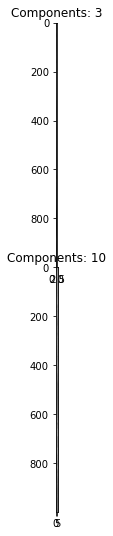

In [8]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.fit_transform(image_bw)
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [3, 10]

plt.figure(figsize=[20,9])

for i in range(2):
    plt.subplot(2,1,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

